### Objectif : comparaison des variantes de la descente de gradient

dans cette partie, nous allons comparer les trois approches principales pour optimiser la fonction de coût $J(\theta)$. le choix de la méthode influence directement la vitesse de convergence et la stabilité du modèle.

#### 1. batch gradient descent (descente de gradient par lot)
- **principe** : utilise l'intégralité du dataset pour calculer le gradient à chaque itération.
- **avantage** : convergence stable vers le minimum.
- **inconvénient** : très lent et gourmand en mémoire sur de grands jeux de données.

#### 2. stochastic gradient descent - sgd (stochastique)
- **principe** : met à jour les paramètres $\theta$ après avoir consulté chaque exemple un par un.
- **avantage** : beaucoup plus rapide et peut s'échapper des minima locaux.
- **inconvénient** : la convergence est "bruyante" (oscille beaucoup) et ne se stabilise jamais exactement au minimum.

#### 3. mini-batch gradient descent (par mini-lots)
- **principe** : le meilleur compromis. on divise le dataset en petits groupes (ex: 32 ou 64 exemples).
- **avantage** : plus stable que le sgd et plus rapide que le batch. profite de la puissance de calcul vectoriel.

**notre but est de visualiser comment ces trois méthodes atteignent le minimum de l'erreur au cours des itérations.**

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#chargeent des dnnees 
dataset=pd.read_csv("housing_data.csv")
indepX=dataset.iloc[:,0]
depY=dataset.iloc[:,1]


In [3]:
# Division des données en ensembles d'entraînement et de test (80% entraînement, 20% test)
indepX_train, indepX_test, depY_train, depY_test = train_test_split(
    indepX, depY, test_size=0.2, random_state=42
)

In [4]:
# 2. Définition des fonctions du modèle
def hyp(theta, indepX):
    """Fonction hypothèse pour prédire les valeurs à partir des paramètres optimisés"""
    return [theta[0] + theta[1] * x for x in indepX]

In [5]:
def grad(indepX, depY, curr_theta, learning_rate):
    """Fonction pour calculer le gradient des paramètres à chaque étape"""
    # Calcul du gradient basé sur la dérivée partielle de la fonction de coût
    grad = np.zeros(2)  # Gradient pour theta[0] (biais) et theta[1] (poids)
    m = len(indepX)     # Nombre de données
    
    for i in range(m):
        x = indepX.iloc[i]
        y = depY.iloc[i]
        
        # Formules des dérivées partielles
        grad[0] += (-1/m) * (y - (curr_theta[0] + curr_theta[1] * x))
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + curr_theta[1] * x))
    
    # Mise à jour des paramètres en fonction du gradient
    new_theta = np.zeros(2)
    temp0 = curr_theta[0] - learning_rate * grad[0]
    temp1 = curr_theta[1] - learning_rate * grad[1]
    new_theta[0] = temp0
    new_theta[1] = temp1
    
    return new_theta

In [6]:
def gradientDescent(indepX, depY, init_theta, learning_rate, num_iterations):
    """Fonction de descente de gradient pour optimiser les paramètres du modèle."""
    theta = init_theta
    for i in range(num_iterations):
        theta = grad(indepX, depY, theta, learning_rate)
    return theta

In [7]:
def hypothese(theta, x):
    """Calcule la prediction lineaire : h(x) = theta0 + theta1 * x"""
    return theta[0] + theta[1] * x

In [8]:

# 1. Gradient Descent BATCH (Prend tout le dataset)

def gradient_batch(x, y, theta, learning_rate):
    m = len(y)
    erreurs = hypothese(theta, x) - y
    grad0 = (2 / m) * np.sum(erreurs)
    grad1 = (2 / m) * np.sum(erreurs * x)
    theta[0] -= learning_rate * grad0
    theta[1] -= learning_rate * grad1
    return theta


In [9]:

# 2. Gradient Descent STOCHASTIQUE (Un seul exemple a la fois)

def gradient_stochastique(x, y, theta, learning_rate):
    m = len(y)
    # On parcourt chaque exemple un par un
    for i in range(m):
        # Tirage aleatoire d'un index pour eviter les cycles
        idx = np.random.randint(0, m)
        xi = x[idx]
        yi = y[idx]
        
        erreur = hypothese(theta, xi) - yi
        grad0 = 2 * erreur
        grad1 = 2 * erreur * xi
        
        theta[0] -= learning_rate * grad0
        theta[1] -= learning_rate * grad1
    return theta


In [10]:

# 3. Gradient Descent MINI-BATCH (Des petits paquets)

def gradient_minibatch(x, y, theta, learning_rate, batch_size=32):
    m = len(y)
    # Melange des donnees
    indices = np.random.permutation(m)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    for i in range(0, m, batch_size):
        xi = x_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        n = len(yi)
        
        erreurs = hypothese(theta, xi) - yi
        grad0 = (2 / n) * np.sum(erreurs)
        grad1 = (2 / n) * np.sum(erreurs * xi)
        
        theta[0] -= learning_rate * grad0
        theta[1] -= learning_rate * grad1
    return theta


In [13]:
def main():
    # Chargement des données
    try:
        dataset = pd.read_csv("housing_data.csv")
        cols_num = dataset.select_dtypes(include=np.number).columns
        x_data = dataset[cols_num[0]].values
        y_data = dataset[cols_num[1]].values
    except Exception as e:
        print(f"Erreur lors du chargement : {e}")
        return

    # Normalisation des données
    x_mean, x_std = x_data.mean(), x_data.std()
    x_scaled = (x_data - x_mean) / x_std

    # Séparation train/test
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2)

    # Initialisation des paramètres
    theta = np.zeros(2)
    lr = 0.01
    epochs = 1000

    # Choix du type de gradient
    print("Choisissez le type de gradient :")
    print("1 - Batch")
    print("2 - Stochastique")
    print("3 - Mini-batch")
    choix = input("Votre choix (1/2/3) : ")

    # Boucle d'entraînement
    for _ in range(epochs):
        if choix == "1":
            theta = gradient_batch(x_train, y_train, theta, lr)
        elif choix == "2":
            theta = gradient_stochastique(x_train, y_train, theta, lr)
        elif choix == "3":
            theta = gradient_minibatch(x_train, y_train, theta, lr, batch_size=16)
        else:
            print("Choix invalide.")
            return

    # Test sur un exemple
    #y_pred = hypothese(theta, x_test[0])
    #print(f"Prédit : {y_pred:.2f} | Réel : {y_test[0]:.2f}")
    for i in range(len(x_test)):
        y_pred = hypothese(theta, x_test[i])
        print(f"Prédit : {y_pred:.2f} | Réel : {y_test[i]:.2f}")

if __name__ == "__main__":
    main()

Choisissez le type de gradient :
1 - Batch
2 - Stochastique
3 - Mini-batch


Prédit : 80997.38 | Réel : 89792.00
Prédit : 76787.97 | Réel : 74219.00
Prédit : 403787.09 | Réel : 443719.00
Prédit : 370317.16 | Réel : 431609.00
Prédit : 365286.40 | Réel : 421645.00
Prédit : 349680.80 | Réel : 364882.00
Prédit : 178224.43 | Réel : 159783.00
Prédit : 352452.84 | Réel : 396270.00
Prédit : 295574.51 | Réel : 308882.00
Prédit : 342186.00 | Réel : 336662.00


## Implémentation KNN
**Objectif** :tester l'admissibilité, on doit voir sa distance entre lui et tous les autres étudiants et on regarde les 3 les plus proches de lui.

pour cet exercice, j'implémente l'algorithme des **k plus proches voisins** manuellement. l'objectif est de classer un nouvel étudiant comme "admis" ou "redoublant".

#### étapes suivies :
1. **distance euclidienne** : pour chaque point $x_i$ du dataset, on calcule la distance avec le nouveau point $u$ :
   $$d(u, x_i) = \sqrt{(X_u - X_{x_i})^2 + (Y_u - Y_{x_i})^2}$$
2. **tri** : on classe les distances de la plus petite à la plus grande.
3. **vote** : on sélectionne les $k$ premières distances et on regarde la classe majoritaire parmi ces voisins.

In [ ]:
import numpy as np

# 1. données d'entraînement (matière 1, matière 2)
x_train = np.array([
    [90, 85], [85, 80], [88, 78], # admis (1)
    [40, 45], [42, 50], [38, 42]  # redoublants (0)
])
y_train = np.array([1, 1, 1, 0, 0, 0]) 

# 2. paramètres de test
nouveau_etudiant = np.array([87, 82])
k = 3 # modification demandée : k=3

# --- algorithme knn ---

# a. calcul des distances euclidiennes
distances = []
for i in range(len(x_train)):
    # calcul manuel de la distance
    diff = x_train[i] - nouveau_etudiant
    dist = np.sqrt(np.sum(diff**2))
    distances.append((dist, y_train[i]))

# b. trier les points du plus proche au plus loin
distances.sort(key=lambda x: x[0])

# c. sélection des 3 plus proches voisins
voisins_choisis = distances[:k]

# d. vote majoritaire
classes_finales = [v[1] for v in voisins_choisis]
pred_finale = 1 if classes_finales.count(1) > classes_finales.count(0) else 0

# e. calcul des probabilités pour l'affichage
p_admis = classes_finales.count(1) / k
p_redoublant = classes_finales.count(0) / k

# 3. affichage des résultats
res_texte = "admis" if pred_finale == 1 else "redoublant"
print(f"--- résultats knn manuel (k={k}) ---")
print(f"le nouvel étudiant est classé : {res_texte}")
print(f"probabilité admis : {p_admis * 100:.1f}%")
print(f"probabilité redoublant : {p_redoublant * 100:.1f}%")

--- résultats knn manuel (k=3) ---
le nouvel étudiant est classé : admis
probabilité admis : 100.0%
probabilité redoublant : 0.0%


## La Visualisation 

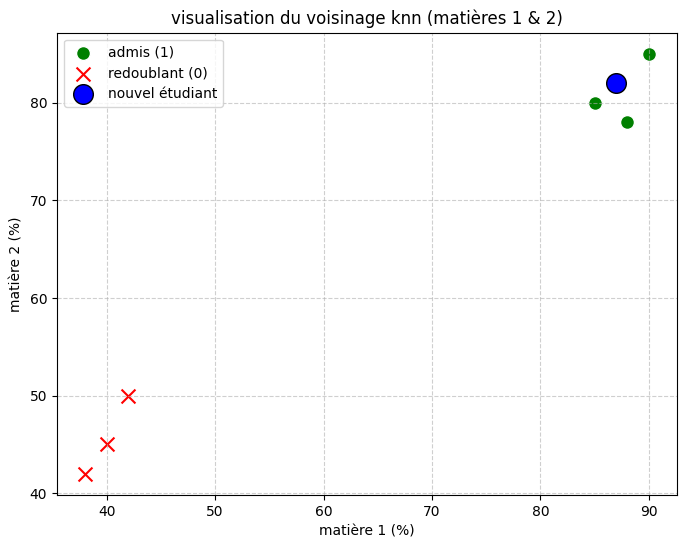

In [17]:
import matplotlib.pyplot as plt

# 1. séparation des données pour l'affichage (indexation booléenne)
admis = x_train[y_train == 1]
redoublants = x_train[y_train == 0]

# 2. création de la figure
plt.figure(figsize=(8, 6))

# dessiner les points existants
plt.scatter(admis[:, 0], admis[:, 1], color='green', label='admis (1)', s=100, edgecolors='white')
plt.scatter(redoublants[:, 0], redoublants[:, 1], color='red', label='redoublant (0)', s=100, marker='x')

# dessiner le nouveau point (87, 82)
# on utilise une taille (s=200) plus grande pour le mettre en évidence
plt.scatter([87], [82], color='blue', s=200, label='nouvel étudiant', edgecolors='black', zorder=5)

# 3. configuration des axes et légendes
plt.xlabel('matière 1 (%)')
plt.ylabel('matière 2 (%)')
plt.title('visualisation du voisinage knn (matières 1 & 2)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# affichage
plt.show()